# Bootstrap

### Workflow
- Run Snakemake pipeline and add all data together

In [1]:
# Imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#%matplotlib inline

In [2]:
# File name
f = "../data/test/yeast/bootstrap/test.stats.bootstrap3.txt"

In [3]:
# Pandas data frame
df = pd.read_csv(f, sep = "\t")

In [4]:
# Data frame check 
df.head()

,Size,Run,Node:1,Node:2,Node:3,Node:4,Node:5,Seq:1,Seq:2,Seq:3,Seq:4,Seq:5,Unnamed: 12
0,2,0,6463,13123,NaN,NaN,NaN,213888,608508,NaN,NaN,NaN,NaN
1,2,1,12238,10890,NaN,NaN,NaN,112920,666501,NaN,NaN,NaN,NaN
2,2,2,10184,11766,NaN,NaN,NaN,105283,665966,NaN,NaN,NaN,NaN
3,2,3,7651,13495,NaN,NaN,NaN,94383,680604,NaN,NaN,NaN,NaN
4,2,4,11671,10335,NaN,NaN,NaN,239709,602341,NaN,NaN,NaN,NaN


In [5]:
# Just check those with 2 cores
df2 = df.loc[df["Size"] == 2]
df2

,Size,Run,Node:1,Node:2,Node:3,Node:4,Node:5,Seq:1,Seq:2,Seq:3,Seq:4,Seq:5,Unnamed: 12
0,2,0,6463,13123,NaN,NaN,NaN,213888,608508,NaN,NaN,NaN,NaN
1,2,1,12238,10890,NaN,NaN,NaN,112920,666501,NaN,NaN,NaN,NaN
2,2,2,10184,11766,NaN,NaN,NaN,105283,665966,NaN,NaN,NaN,NaN
3,2,3,7651,13495,NaN,NaN,NaN,94383,680604,NaN,NaN,NaN,NaN
4,2,4,11671,10335,NaN,NaN,NaN,239709,602341,NaN,NaN,NaN,NaN
5,2,5,8999,12006,NaN,NaN,NaN,220003,609804,NaN,NaN,NaN,NaN
6,2,6,6636,13164,NaN,NaN,NaN,236306,608877,NaN,NaN,NaN,NaN
7,2,7,7650,13368,NaN,NaN,NaN,74047,679194,NaN,NaN,NaN,NaN
8,2,8,1521,16409,NaN,NaN,NaN,79930,683477,NaN,NaN,NaN,NaN
9,2,9,10165,11903,NaN,NaN,NaN,123691,668340,NaN,NaN,NaN,NaN


In [6]:
# Get the index when sequence starts (it goes till end)
seq_index = [i for i, x in enumerate(list(df2.columns)) if x.startswith("Seq")][0]
seq_index

7

In [7]:
# Get the index when nodes starts (till seq index)
start_index = [i for i, x in enumerate(list(df2.columns)) if x.startswith("Run")][0]
start_index

1

In [8]:

node_soft = df.apply(lambda x: sum([x for x in x.iloc[start_index+1:seq_index].values if not np.isnan(x)][1:-1]), axis = 1)
node_core = df.apply(lambda x: [x for x in x.iloc[start_index+1:seq_index].values if not np.isnan(x)][-1], axis = 1)
node_private = df.apply(lambda x: [x for x in x.iloc[start_index+1:seq_index].values if not np.isnan(x)][0], axis = 1)
node_pan = df.apply(lambda x: sum([x for x in x.iloc[start_index+1:seq_index].values if not np.isnan(x)][:]), axis = 1)

In [9]:
seq_soft = df.apply(lambda x: sum([x for x in x.iloc[seq_index:].values if not np.isnan(x)][1:-1]), axis = 1)
seq_core = df.apply(lambda x: [x for x in x.iloc[seq_index:].values if not np.isnan(x)][-1], axis = 1)
seq_private = df.apply(lambda x: [x for x in x.iloc[seq_index:].values if not np.isnan(x)][0], axis = 1)
seq_pan = df.apply(lambda x: sum([x for x in x.iloc[seq_index:].values if not np.isnan(x)][:]), axis = 1)

In [10]:
new_rc_params = {'text.usetex': False,
"svg.fonttype": 'none'
}

plt.rcParams.update(new_rc_params)

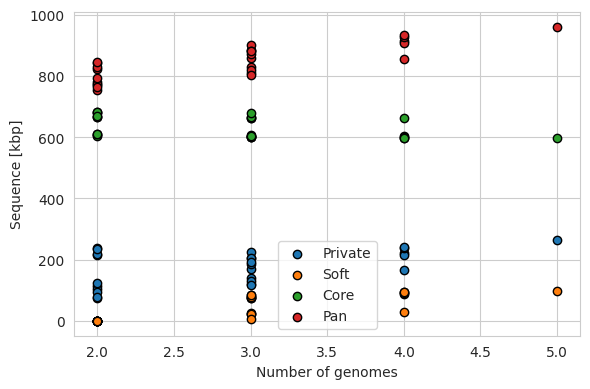

In [12]:
plt.figure(figsize = (6,4))
plt.scatter(df["Size"], seq_private/1000, edgecolor = "black", label = "Private")
plt.scatter(df["Size"], seq_soft/1000, edgecolor = "black", label = "Soft")
plt.scatter(df["Size"],  seq_core/1000, edgecolor = "black", label = "Core")
plt.scatter(df["Size"],  seq_pan/1000, edgecolor = "black", label = "Pan")
plt.xlabel("Number of genomes")
plt.ylabel("Sequence [kbp]")
plt.legend()
plt.tight_layout()
#plt.savefig("plots/bootstrap.pdf")

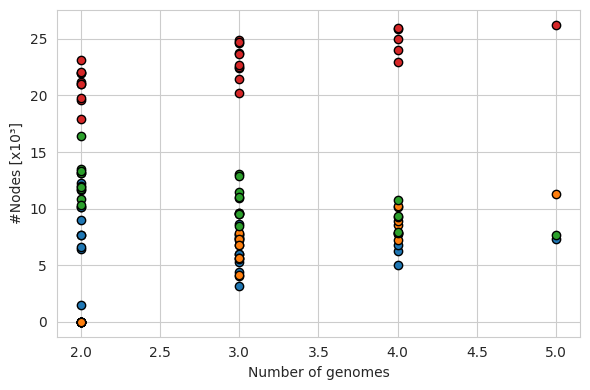

In [13]:
plt.figure(figsize = (6,4))
plt.scatter(df["Size"], node_private/1000, edgecolor = "black")
plt.scatter(df["Size"], node_soft/1000, edgecolor = "black")
plt.scatter(df["Size"],  node_core/1000, edgecolor = "black")
plt.scatter(df["Size"],  node_pan/1000, edgecolor = "black")
plt.xlabel("Number of genomes")
plt.ylabel("#Nodes [x10³]")
plt.tight_layout()